# Climate change

One of the most important environmental issues is `global warming` that is caused by the `emission of greenhouse gases`, such as carbon dioxide, water vapor, and nitrous oxide. These gases have an insulating effect on the climate, which causes the atmosphere `to trap heat` and `warm the earth`. Many of these gases are released from factory farming, car exhaust, and fossil fuel extraction. 

Global temperatures have risen since records began to be kept in the 1850s, and temperatures are expected to increase by the end of this century.

Various solutions are discussed, such as those described by [NASA](https://climate.nasa.gov/solutions/adaptation-mitigation/).

[1. Explore global Temperature](#temp)

[2. Effect on food production](#food)

[3. Effect on desease propagation](#desease)

Further details [here](https://towardsdatascience.com/tagged/climate-change).

## 1. Explore global temperature <a class="anchor" id="temp"></a>

Let's start to perform simple `exploratory analysis of public climate change data` provided by [`datahub`](https://datahub.io/collections/climate-change).

### Load data

From the global temperature [datahub](https://datahub.io/core/global-temp#data), let's consider the [`annual`](https://pkgstore.datahub.io/core/global-temp/annual_csv/data/a26b154688b061cdd04f1df36e4408be/annual_csv.csv) data. 

In [24]:
import pandas as pd

df_annual_global_temp = pd.read_csv('./data/annual_temp.csv')
df_annual_global_temp.head()

Source  Year    Mean
0     GCAG  2016  0.9363
1  GISTEMP  2016  0.9900
2     GCAG  2015  0.8998
3  GISTEMP  2015  0.8700
4     GCAG  2014  0.7408

### Filter data

Let's get records corresponding to the NASA GISTEMP source.
* Use the [`reset_index()`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.reset_index.html) to reset the index of the dataframe.

In [25]:
df_nasa_gistemp_global_temp = df_annual_global_temp[df_annual_global_temp['Source'] == 'GISTEMP'][["Source", "Year", "Mean"]]
df_nasa_gistemp_global_temp.head()

Source  Year  Mean
1  GISTEMP  2016  0.99
3  GISTEMP  2015  0.87
5  GISTEMP  2014  0.74
7  GISTEMP  2013  0.65
9  GISTEMP  2012  0.63

In [26]:
df_nasa_gistemp_global_temp = df_annual_global_temp[df_annual_global_temp['Source'] == 'GISTEMP'].reset_index()[["Source", "Year", "Mean"]]
df_nasa_gistemp_global_temp.head()

Source  Year  Mean
0  GISTEMP  2016  0.99
1  GISTEMP  2015  0.87
2  GISTEMP  2014  0.74
3  GISTEMP  2013  0.65
4  GISTEMP  2012  0.63

### Explore data

Plot the `Mean` annual temperature vs. `Year` (i.e. time).
* Use `seaborn`
* Set aesthetic parameters `seaborn.set()`
* Use `seaborn.lineplot()`

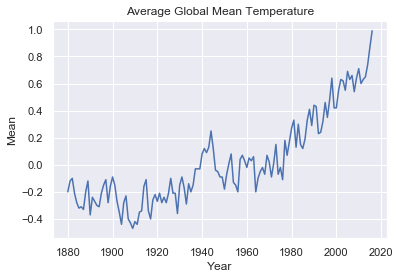

In [4]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

sns.lineplot(df_nasa_gistemp_global_temp['Year'], df_nasa_gistemp_global_temp['Mean'])
plt.ylabel("Mean")
plt.title("Average Global Mean Temperature")
plt.show()

## 2. Effect on food production  <a class="anchor" id="food"></a>

Consider the global crop yield data provided by [`ourworldindata.org`](https://ourworldindata.org/).

In [5]:
df_rice_yields = pd.read_csv('./data/rice-yields.csv')
df_rice_yields.head()

Entity Code  Year  \
0  Afghanistan  AFG  1961   
1  Afghanistan  AFG  1962   
2  Afghanistan  AFG  1963   
3  Afghanistan  AFG  1964   
4  Afghanistan  AFG  1965   

   Crops - Cereals (Rice Milled Eqv) - 1817 - Yield - 5419 - hg/ha (tonnes per hectare)  
0                                             1.0831                                     
1                                             1.0480                                     
2                                             0.9548                                     
3                                             1.0461                                     
4                                             1.0621

Determine the unique set of regions.

In [27]:
from collections import Counter

#print(set(df_rice_yields['Entity'].values))
print("NUMBER OF REGIONS: ", len(set(df_rice_yields['Entity'].values)))

NUMBER OF REGIONS:  229


There are a total of 229 regions. 

Knowing that developing regions are more vulnerable to the risks that climate change pose, it would be useful to narrow our scope. [Time Magazine](https://time.com/5687470/cities-countries-most-affected-by-climate-change/) stated Nigeria, Haiti, Yemen, Philippines and Fiji will face the most severe consequences of climate change.

With that in mind we can start by looking at rice production in Nigeria:

In [28]:
df_nigeria_rice_yields = df_rice_yields[df_rice_yields['Entity']=='Nigeria'].reset_index()[["Entity", "Code", "Year", 'Crops - Cereals (Rice Milled Eqv) - 1817 - Yield - 5419 - hg/ha (tonnes per hectare)']]
print(df_nigeria_rice_yields.head())

    Entity Code  Year  \
0  Nigeria  NGA  1961   
1  Nigeria  NGA  1962   
2  Nigeria  NGA  1963   
3  Nigeria  NGA  1964   
4  Nigeria  NGA  1965   

   Crops - Cereals (Rice Milled Eqv) - 1817 - Yield - 5419 - hg/ha (tonnes per hectare)  
0                                             0.7388                                     
1                                             0.7747                                     
2                                             0.7577                                     
3                                             0.7113                                     
4                                             0.6808                                     


Next we can plot the crop yield for rice in Nigeria from 1960–2020:

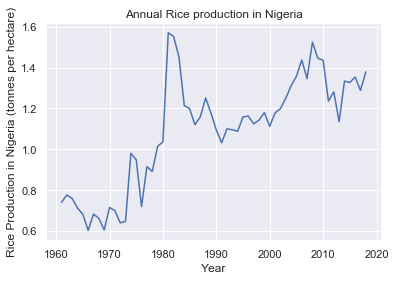

In [29]:
crop = 'Crops - Cereals (Rice Milled Eqv) - 1817 - Yield - 5419 - hg/ha (tonnes per hectare)'
sns.lineplot(df_nigeria_rice_yields['Year'], df_nigeria_rice_yields[crop])
plt.ylabel("Rice Production in Nigeria (tonnes per hectare)")
plt.title("Annual Rice production in Nigeria")
plt.show()

Overlay the global annual mean temperature and the crop yields for rice in Nigeria:


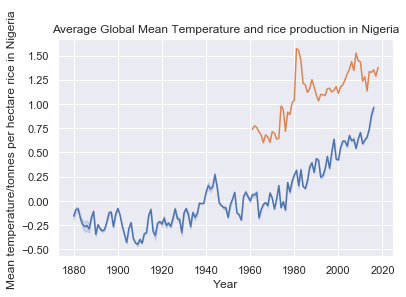

In [30]:
sns.set()
sns.lineplot(df_annual_global_temp['Year'], df_annual_global_temp['Mean'])
plt.ylabel("Mean")
plt.title("Average Global Mean Temperature and rice production in Nigeria")

sns.lineplot(df_nigeria_rice_yields['Year'], df_nigeria_rice_yields[crop])
plt.ylabel("Mean temperature/tonnes per hectare rice in Nigeria ")
plt.show()

Interestingly enough, there seems to be a significant drop in rice production in Nigeria between 1987 and 2006.

Look at rice production in Haiti:

In [10]:
df_haiti_rice_yields = df_rice_yields[df_rice_yields['Entity']=='Haiti'].reset_index()[["Entity", "Code", "Year", crop]]
df_haiti_rice_yields.head()

Entity Code  Year  \
0  Haiti  HTI  1961   
1  Haiti  HTI  1962   
2  Haiti  HTI  1963   
3  Haiti  HTI  1964   
4  Haiti  HTI  1965   

   Crops - Cereals (Rice Milled Eqv) - 1817 - Yield - 5419 - hg/ha (tonnes per hectare)  
0                                             0.9905                                     
1                                             0.9989                                     
2                                             1.0081                                     
3                                             1.0073                                     
4                                             1.0196

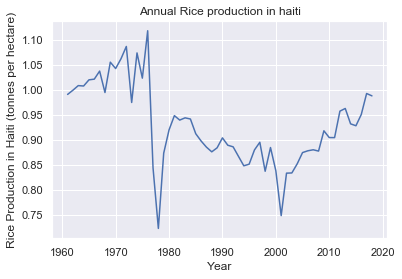

In [11]:
crop = 'Crops - Cereals (Rice Milled Eqv) - 1817 - Yield - 5419 - hg/ha (tonnes per hectare)'
sns.lineplot(df_haiti_rice_yields['Year'], df_haiti_rice_yields[crop])
plt.ylabel("Rice Production in Haiti (tonnes per hectare)")
plt.title("Annual Rice production in haiti")
plt.show()

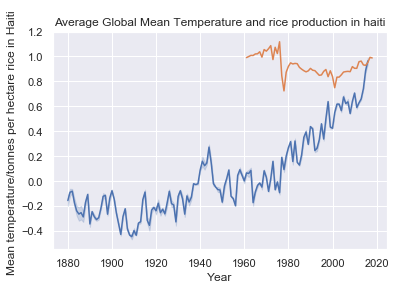

In [12]:
sns.set()
sns.lineplot(df_annual_global_temp['Year'], df_annual_global_temp['Mean'])
plt.ylabel("Mean")
plt.title("Average Global Mean Temperature and rice production in haiti")

sns.lineplot(df_haiti_rice_yields['Year'], df_haiti_rice_yields[crop])
plt.ylabel("Mean temperature/tonnes per hectare rice in Haiti ")
plt.show()

There also seems to be a slight drop in rice production in Haiti.

We can also look at the same plots for `wheat production` in Nigeria:

In [13]:
df_wheat_yields = pd.read_csv("./data/wheat-yields.csv")
df_wheat_yields.head()

Entity Code  Year  \
0  Afghanistan  AFG  1961   
1  Afghanistan  AFG  1962   
2  Afghanistan  AFG  1963   
3  Afghanistan  AFG  1964   
4  Afghanistan  AFG  1965   

   Crops - Wheat - 15 - Yield - 5419 - hg/ha (tonnes per hectare)  
0                                             1.0220               
1                                             0.9735               
2                                             0.8317               
3                                             0.9510               
4                                             0.9723

In [14]:
crop = 'Crops - Wheat - 15 - Yield - 5419 - hg/ha (tonnes per hectare)'
df_nigeria_wheat_yields = df_wheat_yields[df_wheat_yields['Entity']=='Nigeria'].reset_index()[["Entity", "Code", "Year", crop]]
print(df_nigeria_wheat_yields.head())

    Entity Code  Year  \
0  Nigeria  NGA  1961   
1  Nigeria  NGA  1962   
2  Nigeria  NGA  1963   
3  Nigeria  NGA  1964   
4  Nigeria  NGA  1965   

   Crops - Wheat - 15 - Yield - 5419 - hg/ha (tonnes per hectare)  
0                                             1.7778               
1                                             1.7778               
2                                             1.7778               
3                                             1.8182               
4                                             1.8182               


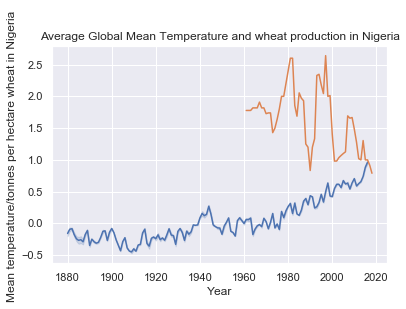

In [15]:
sns.set()
sns.lineplot(df_annual_global_temp['Year'], df_annual_global_temp['Mean'])
plt.ylabel("Mean")
plt.title("Average Global Mean Temperature and wheat production in Nigeria")

sns.lineplot(df_nigeria_wheat_yields['Year'], df_nigeria_wheat_yields[crop])
plt.ylabel("Mean temperature/tonnes per hectare wheat in Nigeria ")
plt.show()

Again, there seems to be a downward trend in wheat production in Nigeria with increase in yearly global temperature.

A more exhaustive analysis is required to draw any conclusions from the data.

### Homework

* Continue the analysis of rice yields for Yemen, Philippines and Fiji 
* Continue the analysis of wheat yields for Haiti, Yemen, Philippines and Fiji
* Repeat the analysis with [monthly global temperature data](./data/monthly_temp.csv)

## 3. Effect on desease propagation  <a class="anchor" id="desease"></a>

Let's take a closer look at some infectious disease data, given the future implications of climate change on [`disease propagation`](https://www.who.int/publications/10-year-review/health-guardian/en/).

Determine the mean incidences of malaria per 1,000 people provided by [`ourworldindata.org`](https://ourworldindata.org/malaria). 

In [31]:
pd.set_option('display.max_columns', None)
df_malaria = pd.read_csv('./data/incidence-of-malaria.csv')
df_malaria.head()

Entity Code  Year  \
0  Afghanistan  AFG  2000   
1  Afghanistan  AFG  2005   
2  Afghanistan  AFG  2010   
3  Afghanistan  AFG  2015   
4      Algeria  DZA  2000   

   Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)  
0                                         107.100000                                   
1                                          46.500000                                   
2                                          23.900000                                   
3                                          23.600000                                   
4                                           0.037746

We can also look at the unique set of regions:

In [32]:
from collections import Counter
#print(set(df_malaria['Entity'].values))
print("NUMBER OF REGIONS: ", len(set(df_malaria['Entity'].values)))

NUMBER OF REGIONS:  127


There are 127 regions. 

Looking at malaria incidences in Nigeria:

In [33]:
incidence = df_malaria.columns[3]
df_nigeria_malaria = df_malaria[df_malaria['Entity']=='Nigeria'].reset_index()[["Entity", "Code", "Year", incidence]]
print(df_nigeria_malaria.head())

    Entity Code  Year  \
0  Nigeria  NGA  2000   
1  Nigeria  NGA  2005   
2  Nigeria  NGA  2010   
3  Nigeria  NGA  2015   

   Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)  
0                                              497.8                                   
1                                              482.6                                   
2                                              416.3                                   
3                                              380.8                                   


Next we can plot the malaria incidences in Nigeria from 2000–2015:


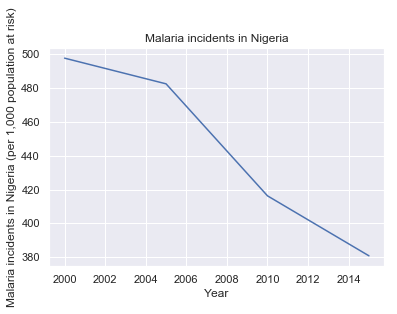

In [19]:
sns.lineplot(df_nigeria_malaria['Year'], df_nigeria_malaria[incidence])
plt.ylabel("Malaria incidents in Nigeria (per 1,000 population at risk)")
plt.title("Malaria incidents in Nigeria")
plt.show()

Next we can overlay the global annual mean temperature (scaled by a factor 100 for clarity) and the malaria incidence in Nigeria:

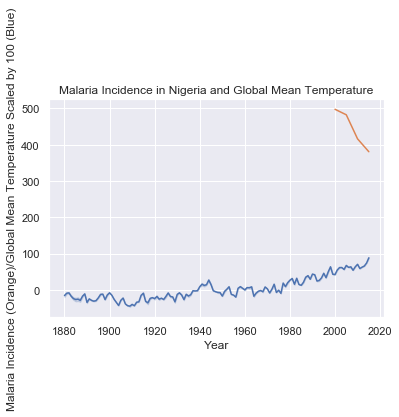

In [34]:
df_before_global_temp = df_annual_global_temp[df_annual_global_temp['Year'] <= 2015]
sns.set()
sns.lineplot(df_before_global_temp['Year'], df_before_global_temp['Mean']*100)
plt.ylabel("Mean")

sns.lineplot(df_nigeria_malaria['Year'], df_nigeria_malaria[incidence])
plt.ylabel("Malaria Incidence (Orange)/Global Mean Temperature Scaled by 100 (Blue)")
plt.title("Malaria Incidence in Nigeria and Global Mean Temperature")
plt.show()

While we can see that the decrease in malaria incidence is starting to plateau with rising average temperatures, the link between the warming climate and the plateau in malaria incidence isn’t very convincing.

We can also take a look at Haiti:

In [21]:
df_haiti_malaria = df_malaria[df_malaria['Entity']=='Haiti'].reset_index()[["Entity", "Code", "Year", incidence]]
print(df_malaria.head())

        Entity Code  Year  \
0  Afghanistan  AFG  2000   
1  Afghanistan  AFG  2005   
2  Afghanistan  AFG  2010   
3  Afghanistan  AFG  2015   
4      Algeria  DZA  2000   

   Incidence of malaria (per 1,000 population at risk) (per 1,000 population at risk)  
0                                         107.100000                                   
1                                          46.500000                                   
2                                          23.900000                                   
3                                          23.600000                                   
4                                           0.037746                                   


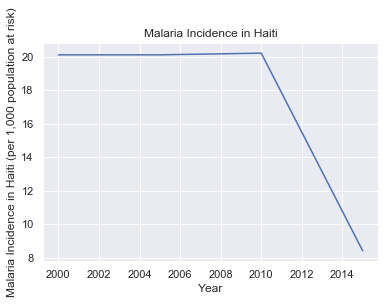

In [22]:
sns.set()
sns.lineplot(df_haiti_malaria['Year'], df_haiti_malaria[incidence])
plt.ylabel("Malaria Incidence in Haiti (per 1,000 population at risk)")
plt.title("Malaria Incidence in Haiti")
plt.show()

The data for Haiti is even less convincing. We can overlay the temperature and malaria data:


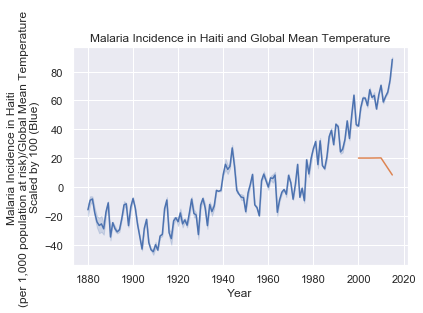

In [23]:
#df_before_global_temp = df_annual_global_temp[df_annual_global_temp['Year'] <= 2015]
sns.set()
sns.lineplot(df_before_global_temp['Year'], df_before_global_temp['Mean']*100)
plt.ylabel("Mean")

sns.lineplot(df_haiti_malaria['Year'], df_haiti_malaria[incidence])
plt.ylabel("Malaria Incidence in Haiti \n(per 1,000 population at risk)/Global Mean Temperature \nScaled by 100 (Blue)")
plt.title("Malaria Incidence in Haiti and Global Mean Temperature")
plt.show()


### Homework

* Continue the analyze by considering other regions.